# SYDE 556/750 --- Assignment 5

## Due Date: Dec 2, 2022


**Student ID: 20775920**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Unlike assignments 1-4, for this assignment the full instructions (including some hints) are in this file.  The cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

- This assignment is worth 30 marks (30% of the final grade). The number of marks for each question is indicated in brackets to the left of each question.

- Clearly label any plot you produce, including the axes. Provide a legend if there are multiple lines in the same plot.

- You won’t be judged on the quality of your code.

- All questions use the nengo default of Leaky Integrate-and-Fire neurons with the default parameter settings (`tau_rc=0.02` and `tau_ref=0.002`).

- Make sure to execute the Jupyter command “Restart Kernel and Run All Cells” before submitting your solutions. You will lose marks if your code fails to run or produces results that differ significantly from what you’ve submitted.

- Rename the completed notebook to `syde556_assignment_05_<STUDENT ID>.ipynb` and submit it via email to the TA (Nicole Dumont <ns2dumont@uwaterloo.ca>). The deadline is at 23:59 EST on Dec 2, 2022.

- There is a late penalty of one mark per day late. Please contact celiasmith@uwaterloo.ca if there are extenuating circumstances.

- **For this assignment, you must use [Nengo](https://www.nengo.ai/getting-started/).** Feel free to look through the examples folder and/or the tutorials on the Nengo website before doing this assignment.



In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

import nengo

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an Accumulate-to-Threshold Decision Making Model

One standard account for how brains make simple decision-making tasks is that they gradually accumulate evidence for or against something, and when that evidence hits some threshold, a decision is made.  This sort of model is used to account for the fact that people take longer to make decisions when the evidence is weak.

If you want more background on this, https://www.jneurosci.org/content/34/42/13870 gives a decent overview, but this diagram shows a high-level overview:

![](https://www.jneurosci.org/content/jneuro/34/42/13870/F1.large.jpg)

We're going to make a model of this process. It will make its choice based on a single input value, which gives some evidence as to which choice should be made.  It will indicate a choice by outputting either a 1 or a -1.  If that input evidence is positive, it will be more likely to make the first choice (outputting a 1), and if the input evidence is negative it will be more likely to make the second choice (outputting a -1).

*TIP: The Nengo GUI built-in tutorials 10 through 18 may be useful to give you an overview of different recurrent systems and different ways of modifying ```Ensembles```.*



**a) Accumulation. [2 marks]** Start by building a recurrent system that can add up evidence over time (the accumulator or integrator).  This is a neural ```Ensemble``` that holds a single dimension, and uses a small number of neurons (50).  Provide it with one input ```Node``` that has a constant value of ```[0.1]``` and connect that input into the ```Ensemble``` with a ```Connection```.  Now make a ```Connection``` from the ```Ensemble``` back to itself that computes the identity function.  Since this ```Connection``` is accumulating evidence over time, we want it to be fairly stable, so set ```synapse=0.1``` on this ```Connection``` (leave the other `Connection` at its default value).  This means that the neurotransmitter being used will spread out over 100ms, rather than the default 5ms.

If you run the above system with the constant positive input of 0.1 as noted above, the value stored in the accumulator should gradually increase until it hits 1 (this should take about 1 second of simulated time).  If you change the input to be -0.1, it should gradually decrease until it hits -1.

Make a single plot that shows the behaviour of the model for four different inputs: 0.2, 0.1, -0.1, and -0.2.  For each input, run the model for 2 seconds (`sim.run(2)`) and plot the value stored in the accumulator `Ensemble`.  Use a `Probe` synapse of 0.01 to get the stored value.

In [2]:
# ✍ <YOUR SOLUTION HERE>


def accumulator(inputs, neurons=50, sim_run = 2, seed = 18945):
    model = nengo.Network(seed = seed)
    with model:
        ensemble = nengo.Ensemble(n_neurons = neurons, dimensions = 1,
                                 neuron_type = nengo.LIF())
        
        nd_input = nengo.Node(inputs)
        connection_1 = nengo.Connection(nd_input, ensemble)
        connection_2 = nengo.Connection(ensemble, ensemble, synapse = 0.1)
    
        ensemble_probe = nengo.Probe(ensemble, synapse=0.01)
    
    with nengo.Simulator(model) as sim:
        sim.run(sim_run)
    
    return sim, ensemble_probe



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

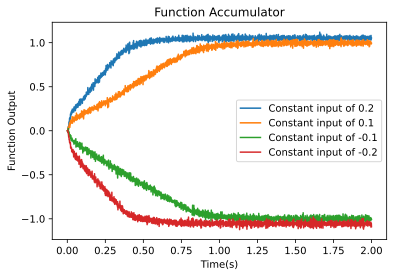

In [3]:
inputs = [0.2,0.1,-0.1,-0.2]

for i in inputs:
    sim_i, ensemble_probe = accumulator(i)
    plt.plot(sim_i.trange(), sim_i.data[ensemble_probe], label='Constant input of {}'.format(i))

plt.title('Function Accumulator')
plt.xlabel('Time(s)')
plt.ylabel('Function Output')
plt.legend()
plt.show()

**b) Accumulator Discussion. [1 mark]** What is the mathematical computation being performed here (i.e. what is the relationship between the input and the output)?  Why does the value stop increasing (or decreasing) when it hits +1 (or -1)?

✍ \<YOUR SOLUTION HERE\>

(dx/dt) = Ax + Bu

let (dx/dt) = u => Ax + Bu = u => A=0 and B=1

B is the identity matrix [1]

A(prime) = tau * A + I and B(prime) = tau * B
 
Subbing in the values we get
A(prime) = I and B(prime) = tau * I


The relationship between the input and output is 1 to 1 that accumulates over time. The value stops increasing/decreasing when it his +1/-1 is due to the radius of the neuron. Adjusting the radius can result in a stronger representation of the accumulator with a wider range of inputs.

**c) Adding random noise to the neurons. [1 mark]** Next, we can add randomness to the neurons.  In standard (non-neural) accumulator models, there is a "random-walk" component that randomly varies the value being accumulated.  We can model this by adding random noise into the ```Ensemble```, which means adding random current to each of the neurons.  The command for this is:

```python
acc.noise = nengo.processes.WhiteSignal(period=10, high=100, rms=1)
```

(where ```acc``` is whatever name you gave your accumulator ```Ensemble```.)

The strength of this noise is set by the ```rms=1``` parameter.  Generate the same plot as in part (a) but with the noise `rms=1`.  Also generate the same plot for `rms=3`, `rms=5`, and `rms=10`.  What happens to the resulting output?

In [4]:
# ✍ <YOUR SOLUTION HERE>

def accumulator(inputs, rms=1, neurons=50, sim_run = 2, seed = 18945):
    model = nengo.Network(seed = seed)
    with model:
        ensemble = nengo.Ensemble(n_neurons = neurons, dimensions = 1,
                                 neuron_type = nengo.LIF())
        ensemble.noise = nengo.processes.WhiteSignal(period=10, high=100, rms=rms)
        
        nd_input = nengo.Node(inputs)
        connection_1 = nengo.Connection(nd_input, ensemble, synapse = 0.005)
        connection_2 = nengo.Connection(ensemble, ensemble, synapse = 0.1)
    
        ensemble_probe = nengo.Probe(ensemble, synapse=0.01)
    
    with nengo.Simulator(model) as sim:
        sim.run(sim_run)
    
    return sim, ensemble_probe

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

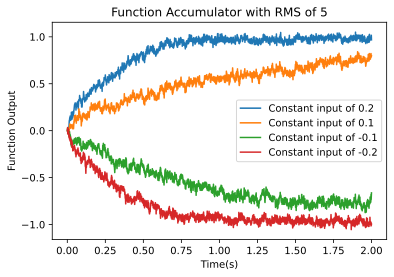

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [5]:
rms = [1,3,5,10]
inputs = [0.2,0.1,-0.1,-0.2]
for r in rms:
    for i in inputs:
        sim_i, ensemble_probe = accumulator(i, rms= r)
        plt.plot(sim_i.trange(), sim_i.data[ensemble_probe], label='Constant input of {}'.format(i))
        plt.title('Function Accumulator with RMS of {}'.format(r))
        plt.xlabel('Time(s)')
        plt.ylabel('Function Output')
    plt.legend()
    plt.show()

✍ \<YOUR SOLUTION HERE\>

With larger RMS values, the accumulator is much noisier and is unable compile evidence over time to result in a decision due to the high noise. With a low RMS value of 1, the neuron is able to accumulate much faster as of a result of a smoother signal. Decision making increasingly delays with higher rms values. The 2 second simulation is not sufficient for the accumulator to reach a decision with higher powers of the filtered white noise signal.  

**e) Adding decision-making. [2 marks]** To complete the basic model, we want to determine when this accumulator passes some threshold.  If the value becomes large enough, we should make one choice (+1), and if it becomes small enough we should make the other choice (-1).  To achieve this, make a new output ```Ensemble``` that is also one-dimensional and has 50 neurons.  Form a ```Connection``` from the accumulator to this new ```Ensemble``` that computes the following function:

```python
def choice(x):
    if x[0] > 0.9:
        return 1
    elif x[0] < -0.9:
        return -1
    else: 
        return 0
```

This new output should now stay at zero until the accumulator value gets large enough, and then quickly move to +1 or -1.

Build this model and plot the output of both the accumulator `Ensemble` and the decision-making `Ensemble`.  Use a noise `rms=3` and for both `Probe`s use a synapse of 0.01.  Do this for all four input values (0.2, 0.1, -0.1, and -0.2).

How well does the system perform?  Does it make decisions faster when there is stronger evidence?  What differences are there (if any) between the computation we are asking the system to perform and the actual result?

*TIP: try running the model a few times to see the variability in the output*

In [6]:
# ✍ <YOUR SOLUTION HERE>

def choice(x):
    if x[0] > 0.9:
        return 1
    elif x[0] < -0.9:
        return -1
    else: 
        return 0

def accumulator(inputs, rms=1, neurons=50, sim_run = 2, seed = 18945):
    model = nengo.Network(seed = seed)
    with model:
        ensemble = nengo.Ensemble(n_neurons = neurons, dimensions = 1,
                                 neuron_type = nengo.LIF())
        

        ensemble.noise = nengo.processes.WhiteSignal(period=10, high=100, rms=rms)
        
        nd_input = nengo.Node(inputs)
        connection_1 = nengo.Connection(nd_input, ensemble, synapse = 0.005)
        connection_2 = nengo.Connection(ensemble, ensemble, synapse = 0.1)
    
        ensemble_probe = nengo.Probe(ensemble, synapse=0.01)
    
    with nengo.Simulator(model) as sim:
        sim.run(sim_run)
    
    return sim, ensemble_probe, ensemble, model
    
def decision_accumulator(inputs, rms=1, neurons=50, sim_run = 2, seed = 18945):
    
    sim, _, ensemble_1, model = accumulator(inputs, rms=rms)
    
    with model:
        ensemble_2 = nengo.Ensemble(n_neurons = neurons, dimensions = 1,
                                 neuron_type = nengo.LIF())
        
        nd_input = nengo.Node(inputs)

        connection_1 = nengo.Connection(ensemble_1,ensemble_2, function=choice)
    
        ensemble_probe = nengo.Probe(ensemble_2, synapse=0.01)
    
    with nengo.Simulator(model) as sim:
        sim.run(sim_run)
    
    return sim, ensemble_probe    



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

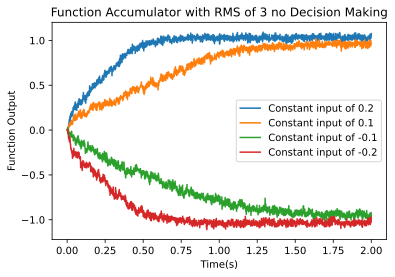

In [7]:
rms = 3 
inputs = [0.2,0.1,-0.1,-0.2]
for i in inputs:
    sim_i, ensemble_probe, _, _ = accumulator(i, rms= rms)
    plt.plot(sim_i.trange(), sim_i.data[ensemble_probe], label='Constant input of {}'.format(i))
    plt.title('Function Accumulator with RMS of {} no Decision Making'.format(rms))
    plt.xlabel('Time(s)')
    plt.ylabel('Function Output')
plt.legend()
plt.show()



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

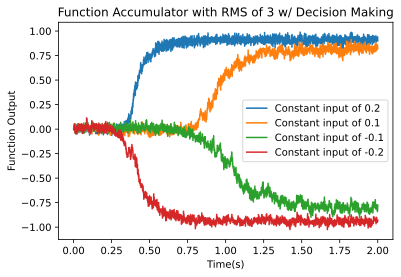

In [8]:
rms = 3
inputs = [0.2,0.1,-0.1,-0.2]
for i in inputs:
    sim_i, ensemble_probe, = decision_accumulator(i, rms= rms)
    plt.plot(sim_i.trange(), sim_i.data[ensemble_probe], label='Constant input of {}'.format(i))
    plt.title('Function Accumulator with RMS of {} w/ Decision Making'.format(rms))
    plt.xlabel('Time(s)')
    plt.ylabel('Function Output')
plt.legend()
plt.show()

✍ \<YOUR SOLUTION HERE\>

<!-- How well does the system perform? Does it make decisions faster when there is stronger evidence? What differences are there (if any) between the computation we are asking the system to perform and the actual result? -->

The system performs well as once the decision threshold has been reached from accumulation, the model quickly outputs a +1 / -1. This can be seen from ~ 0.4 to ~ 0.6 for input of +- 0.2 and  ~ 0.9 to ~ 1.25 seconds for input of +- 0.1.

With stronger evidence, we can see that decisions are indeed made faster. With inputs of +- 0.2, decisions were made at ~0.5 seconds. With inputs of +-0.1, the time to make a decision was almost double, at ~ 0.8 seconds. 

Between the system computations and the actual results, we see that the system acheives an output of 1 by the end of the simulation time for all selected inputs. Due to a neuron radius of 1, we expect this to happen as this is the max output value for the model. Since we set the accumulator threshold to 0.9, the decision times are made just before 0.5s and just before 1.0s for inputs 0.2 and 0.1.  

**f) Combining Ensembles. [2 marks]** An alternative implementation would be to combine the two separate 1-dimensional `Ensembles` into one 2-dimensional `Ensemble`.  The Connections are made similarly as in the original model, but they need to target the particular dimensions involved using the ```ens[0]``` and ```ens[1]``` syntax.  Try building the model this way and plot the results.  Do this for a single `Ensemble` with 100 neurons (the same number as the total number of neurons in the original model) and with 500 neurons.  Also, be sure to increase the `radius` as would be appropriate in order to produce values like what we had in the original model, where the accumulator might be storing a 1 and the output might be a 1.

How does combining Ensembles in this way change the performance of the system?  

When the Ensembles are combined together in this way, what are we changing about the biological claims about the model?  In particular, how might we determine whether the real biologicial system has these as separate `Ensembles` or combined together?

In [9]:
# ✍ <YOUR SOLUTION HERE>

def choice(x):
    if x[0] > 0.9:
        return 1
    elif x[0] < -0.9:
        return -1
    else: 
        return 0

    
def accumulator_2d(inputs, rms=1, neurons=100, sim_run = 2, seed = 18945):
    model = nengo.Network(seed = seed)
    with model:
        ensemble = nengo.Ensemble(n_neurons = neurons, dimensions = 2,
                                  radius = np.sqrt(2),
                                  neuron_type = nengo.LIF())
        
        ensemble[0].noise = nengo.processes.WhiteSignal(period=10, high=100, rms=rms)
    
        nd_input = nengo.Node(inputs)
        connection_1 = nengo.Connection(nd_input, ensemble[0], synapse = 0.005)
        connection_2 = nengo.Connection(ensemble[0], ensemble[0], synapse = 0.1)
        connection_2 = nengo.Connection(ensemble[0], ensemble[1], function = choice)
    
        ensemble_1_probe = nengo.Probe(ensemble[0], synapse=0.01)
        ensemble_2_probe = nengo.Probe(ensemble[1], synapse=0.01)
    
    with nengo.Simulator(model) as sim:
        sim.run(sim_run)
    
    return sim, ensemble_1_probe, ensemble_2_probe



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

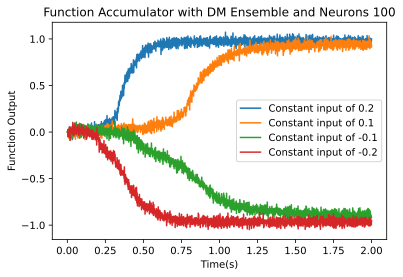

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

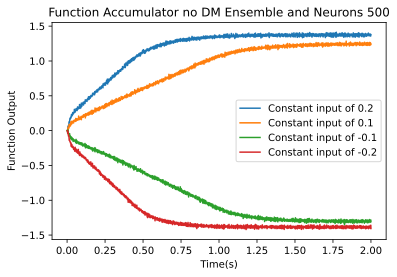

In [10]:
inputs = [0.2,0.1,-0.1,-0.2]
neurons = [100,500]
rms=3
for n in neurons:
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    for i in inputs:
        sim, ensemble_1_probe, ensemble_2_probe = accumulator_2d(i,rms=rms,neurons=n)
        ax1.plot(sim.trange(), sim.data[ensemble_1_probe], label='Constant input of {}'.format(i))
        ax1.set_title('Function Accumulator no DM Ensemble and Neurons {}'.format(n))
        ax1.set_xlabel('Time(s)')
        ax1.set_ylabel('Function Output')
        ax1.legend()

        ax2.plot(sim.trange(), sim.data[ensemble_2_probe], label='Constant input of {}'.format(i))
        ax2.set_title('Function Accumulator with DM Ensemble and Neurons {}'.format(n))
        ax2.set_xlabel('Time(s)')
        ax2.set_ylabel('Function Output')
        ax2.legend()
    plt.show()

✍ \<YOUR SOLUTION HERE\>

<!-- How does combining Ensembles in this way change the performance of the system?

When the Ensembles are combined together in this way, what are we changing about the biological claims about the model? In particular, how might we determine whether the real biologicial system has these as separate Ensembles or combined together? -->

Combining Ensembles in this method results in the same end goal of reaching an output of 1 by then end of the simulation run time. However, the decision making is achieved much quicker compared of adding two different ensembles in a model. Previously, information from one ensemble had to be pased to another, which resulted a delay in information. With a combined ensemble, this delay is minimized, allowing for faster decision making. The new model does not have to wait for the first ensemble to run to establish a connection with the second one, and can make a decision as soon as the decision threshold is met. This is more apparent for an input of +- 0.1 where once the threshold was met, reaching +-1 was faster compared to the previous model.

When ensembles are combined together in this way, the biological claims that we are making relate to neuron dimensionality. In multi dimensional ensemble groups, we are saying that certain dimensions/channels integrate and process input information while other dimensions/channels are involved in computations for decision making. Each dimension can respond to different stimuli. We are saying that neuron populations can perform many different functions and tasks and can modify/share stimuli with one another.

To determine if real biological systems are better represented as seperate Ensembles or combined together, we can use two different stimuli. If a specific ensemble group only reacts (fire) when adjusting one stimulus, we can say that the biological systems have seperate Ensembles as it is only stimulated by a single input. If the ensemble fires for either or both stimulus at the same time, then we can say that biological systems have combined Ensembles. Since these ensembles are stimulated by different types of stimuli, they are combined as certain groups within the Ensemble respond to the different stimuli.  




**g) Improving Representation [2 marks].** Returning to the original implementation from section (e) (with 2 separate Ensembles), we can improve the performance by adjusting the tuning curves of the second `Ensemble`.  Do this by setting `intercepts = nengo.dists.Uniform(0.4, 0.9)`.  This randomly chooses the x-intercepts of the neurons uniformly between 0.4 and 0.9, rather than the default of -1 to 1.  Generate the same plot as in part (e).

How does this affect the performance of the model?  (Try running the model a few times to see the variability in performance). 

Why does the output stay at exactly zero up until the decision is made (rather than being randomly jittering around zero, as in the previous models)?  

Why couldn't we use this approach in the case from part (f) where the `Ensembles` are combined?

In [11]:
# ✍ <YOUR SOLUTION HERE>

def choice(x):
    if x[0] > 0.9:
        return 1
    elif x[0] < -0.9:
        return -1
    else: 
        return 0


def accumulator(inputs, rms=1, neurons=50, sim_run = 2, seed = 18945):
    model = nengo.Network(seed = seed)
    with model:
        ensemble = nengo.Ensemble(n_neurons = neurons, dimensions = 1,
                                 neuron_type = nengo.LIF())
        
        ensemble.noise = nengo.processes.WhiteSignal(period=10, high=100, rms=rms)
        
        nd_input = nengo.Node(inputs)
        connection_1 = nengo.Connection(nd_input, ensemble, synapse = 0.005)
        connection_2 = nengo.Connection(ensemble, ensemble, synapse = 0.1)
    
        ensemble_probe = nengo.Probe(ensemble, synapse=0.01)
    
    with nengo.Simulator(model) as sim:
        sim.run(sim_run)
    
    return sim, ensemble_probe, ensemble, model
    
def decision_accumulator(inputs, rms=1, neurons=50, sim_run = 2, seed = 18945):
    
    sim,_, ensemble_1, model = accumulator(inputs, rms=rms)
    
    with model:
        ensemble_2 = nengo.Ensemble(n_neurons = neurons, dimensions = 1,
                                 intercepts = nengo.dists.Uniform(0.4,0.9),
                                 neuron_type = nengo.LIF())
        
        
        nd_input = nengo.Node(inputs)
        connection_1 = nengo.Connection(ensemble_1,ensemble_2, function=choice)
    
        ensemble_probe = nengo.Probe(ensemble_2, synapse=0.01)
    
    with nengo.Simulator(model) as sim:
        sim.run(sim_run)
    
    return sim, ensemble_probe    



In [12]:
rms = 3 
inputs = [0.2,0.1,-0.1,-0.2]
for i in inputs:
    sim_i, ensemble_probe, _, _ = accumulator(i, rms= rms)
    plt.plot(sim_i.trange(), sim_i.data[ensemble_probe], label='Constant input of {}'.format(i))
    plt.title('Function Accumulator with RMS of {} no Decision Making'.format(rms))
    plt.xlabel('Time(s)')
    plt.ylabel('Function Output')
plt.legend()
plt.show()


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

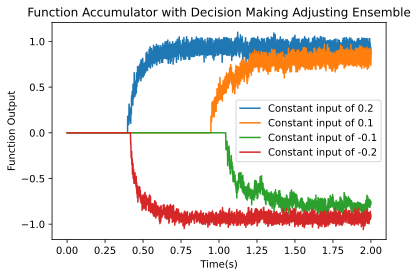

In [13]:
rms = 3
inputs = [0.2,0.1,-0.1,-0.2]
for i in inputs:
    sim_i, ensemble_probe, = decision_accumulator(i, rms= rms)
    plt.plot(sim_i.trange(), sim_i.data[ensemble_probe], label='Constant input of {}'.format(i))
    plt.title('Function Accumulator with Decision Making Adjusting Ensemble'.format(rms))
    plt.xlabel('Time(s)')
    plt.ylabel('Function Output')
plt.legend()
plt.show()

✍ \<YOUR SOLUTION HERE\>

<!-- How does this affect the performance of the model? (Try running the model a few times to see the variability in performance).

Why does the output stay at exactly zero up until the decision is made (rather than being randomly jittering around zero, as in the previous models)?

Why couldn't we use this approach in the case from part (f) where the Ensembles are combined? -->

With a smaller range of possible intercepts, we see no noise until the decision threshold has been reached. With a previous intercept of -1 to 1, there exists neuron activation and activity for outputs at 0, which leads to noisy data prior to decision making. With a new range of 0.4 to 0.9, the output would have to be >=0.4 for neuron activation and activity to begin, which is why noise begins after a decision has been made and not for an output of 0.

This approach could not be used in part (f) which the combined ensembles as modifying the intercepts would adjust both the accumulation and decision making portions of the ensemble. Since we just want to adjust the intecepts of the second ensemble, doing this in f would adjust both, resulting in a misrepresentation of the ideal output.



# 2. Temporal Representation

In class, we discussed the Legendre Memory Unit (LMU), a method for storing input information over time.  This allows us to make connections where the function being computed is a function of the input over some window in time, rather having to be a function of the current input.

In this question, we will use this to build a model that can distinguish a 1Hz sine wave from a 2Hz sine wave.  Notice that it is impossible to perform this task without having information over time; if I just give you a single number at any given point in time, you can't tell whether it's from a 1Hz sine wave or a 2Hz sine wave.  So we need some method to store the previous input information, and that's what the LMU does.

**a) Representing Information over Time. [2 marks]** The core of the LMU is to compute the differential equation ${dx \over dt} = Ax + Bu$ where $A$ and $B$ are carefully chosen using the following math:

```python
A = np.zeros((q, q))
B = np.zeros((q, 1))
for i in range(q):
    B[i] = (-1.)**i * (2*i+1)
    for j in range(q):
        A[i,j] = (2*i+1)*(-1 if i<j else (-1.)**(i-j+1)) 
A = A / theta
B = B / theta        
```

Implement this in Nengo.  Use `theta=0.5` and `q=6`.  The model should consist of a single `Ensemble` that is `q`-dimensional. Use 1000 neurons in this `Ensemble`.  Use `synapse=0.1` on both the recurrent `Connection` and on the input `Connection`.

For the input, give a 1Hz sine wave for the first 2 seconds, and a 2Hz sine wave for the second 2 seconds.  This can be done with:

```python
stim = nengo.Node(lambda t: np.sin(2*np.pi*t) if t<2 else np.sin(2*np.pi*t*2))
```

Run the simulation for 4 seconds.  Plot `x` over the 4 seconds using a `Probe` with `synapse=0.01`.  `x` should be 6-dimensional, and there should be a noticable change between its value before `t=2` and after `t=2`.

In [14]:
def lmu(inputs,neurons=50, sim_run = 2, q=6, seed = 18945):
    model = nengo.Network(seed = seed)
    A = np.zeros((q, q))
    B = np.zeros((q, 1))
    for i in range(q):
        B[i] = (-1.)**i * (2*i+1)
        for j in range(q):
            A[i,j] = (2*i+1)*(-1 if i<j else (-1.)**(i-j+1)) 
            
    theta = 0.5
    A = A / theta
    B = B / theta    
    
    tau = 0.1
    Ax = tau * A + np.eye(A.shape[0])
    Bx = tau * B
    
    ff = lambda nd_input : Bx @ nd_input
    recurrent = lambda output : Ax @ output
    
    with model:
        nd_input = nengo.Node(inputs)
        
        ensemble = nengo.Ensemble(neurons, 
                                  dimensions=q)
        connection_1 = nengo.Connection(nd_input, ensemble, synapse = 0.1, function = ff)
        connection_2 = nengo.Connection(ensemble, ensemble, synapse = 0.1, function  = recurrent)
        
        input_func_probe = nengo.Probe(nd_input)
        ensemble_probe = nengo.Probe(ensemble, synapse = 0.01)
        
    
    with nengo.Simulator(model, dt = 0.001) as sim:
        sim.run(sim_run)
    
    return sim, ensemble_probe, ensemble, model, input_func_probe


In [15]:

q = 6
inputs = (lambda t: np.sin(2*np.pi*t) if t<2 else np.sin(2*np.pi*t*2))
sim, ensemble_probe, ensemble, model, input_func = lmu(inputs, neurons = 1000, sim_run = 4, q = 6)

plt.plot(sim.trange(), sim.data[input_func], label = 'Input Signal')
for i in range(q):
    plt.plot(sim.trange(), sim.data[ensemble_probe][:,i], label='Dimensions: {}'.format(i))
plt.ylabel('Outputs')
plt.xlabel('Time (s)')
plt.title('Outputs of 1Hz and 2Hz sine wave with {} dimensions'.format(q))
plt.legend(bbox_to_anchor = (1,1))

plt.show()



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

**b) Computing the function. [2 marks]** We now want to compute our desired function, which is "output a 1 if we have a 1Hz sine wave and a 0 if we have a 2Hz sine wave".  To do this, we need to make a `Connection` from the LMU `Ensemble` out to a new `Ensemble` that will be our category.  Have it be 1-dimensional with 50 neurons.

Normally in Nengo, when we define a `Connection` we specify a Python function that we want to approximate.  Nengo will then choose a bunch of random `x` values, call the function to determine what the output should be for each one, and use that to solve for the decoders.  However, in this case, we already have that set of `x` values!  That's exactly the data you plotted in part (a).  For the `x` values from t=0 to t=2.0 we want an output of 1.  For the `x` values from t=2.0 to t=4.0, we want an output of -1.  So, to specify these target values, we make a matrix of size `(4000,1)` (4000 for the 4000 time steps that you have `x` values for, and 1 for the output being 1-dimensional).  Set the first 2000 values to 1 and the second 2000 values to -1.

Now that you have your `x` values and the corresponding `target` values, you can tell Nengo to use them when you make the `Connection` like this:

```python
nengo.Connection(a, b, eval_points=x_values, function=target)
```

That will tell Nengo just to use the values you're giving it, rather than randomly sampling `x` and calling a function to get the target values.

Build this model and plot the resulting category (with a `Probe` with `synapse=0.01`).  The output should be near 1 for the first 2 seconds, and near -1 for the second 2 seconds.  (Important note: it will not be perfect at this task!)

In [16]:
# ✍ <YOUR SOLUTION HERE>
inputs = (lambda t: np.sin(2*np.pi*t) if t<2 else np.sin(2*np.pi*t*2))
sim, ensemble_probe, ensemble, model, input_func = lmu(inputs, neurons = 1000, sim_run = 4, q = 6)
output = [[1]*2000, [-1]*2000]
output=np.array(output)
output=output.flatten().reshape(4000,1)

with model:
    ensemble_2 = nengo.Ensemble(50,
                                dimensions = 1)
    connection_3 = nengo.Connection(ensemble, ensemble_2, 
                                    eval_points = sim.data[ensemble_probe],
                                   function = output)
    ensemble_2_probe = nengo.Probe(ensemble_2, synapse = 0.01)
    
    ens_data = sim.data[ensemble_probe]
with nengo.Simulator(model, dt = 0.001) as sim:
    sim.run(4)
    
plt.plot(sim.trange(), sim.data[input_func], label ='Input Function')
plt.plot(sim.trange(), sim.data[ensemble_2_probe], label = 'Function Output')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Outputs')
plt.title('Desired function with 1Hz and 2Hz sine wave input')
plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

**c) Adjusting the input. [2 marks]** Repeat part b) but with an input that is a 2Hz sine wave for the first 2 seconds, and a 1Hz sine wave for the second 2 seconds (i.e. the opposite order as in part (b)).  How well does this perform?  Describe the similarities and differences.  One particular difference you should notice is that the model may make the wrong classification for the first 0.25 seconds.  Why is this happening?  What could you change to fix this?

In [17]:
# ✍ <YOUR SOLUTION HERE>


q = 6
inputs = (lambda t: np.sin(2*np.pi*t*2) if t<2 else np.sin(2*np.pi*t))
sim, ensemble_probe, ensemble, model, input_func = lmu(inputs, neurons = 1000, sim_run = 4, q = 6)


output = [[1]*2000, [-1]*2000]
output=np.array(output)
output=output.flatten().reshape(4000,1)

with model:

    ensemble_3 = nengo.Ensemble(50,
                                dimensions = 1,
                               )
    connection_3 = nengo.Connection(ensemble, ensemble_3, 
                                    eval_points = ens_data,
                                   function = output)
    ensemble_3_probe = nengo.Probe(ensemble_3, synapse = 0.01)
with nengo.Simulator(model, dt = 0.001) as sim:
    sim.run(4)
    
plt.plot(sim.trange(), sim.data[input_func], label ='Input Function')
plt.plot(sim.trange(), sim.data[ensemble_3_probe], label = 'Function Output')
plt.legend()
plt.ylabel('Outputs')
plt.xlabel('Time (s)')
plt.title('Desired function with 2Hz and 1Hz sine wave input')
plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

✍ \<YOUR SOLUTION HERE\>

<!--  How well does this perform? Describe the similarities and differences. One particular difference you should notice is that the model may make the wrong classification for the first 0.25 seconds. Why is this happening? What could you change to fix this? -->

Compared to the original input signal, the reversed version performs similarly. Over time, we can see that both models performs better with the given stimulus. At the first 0.25 seconds, we see that the model classifies this output at 1, when it should be -1. This misclassification is a result of eval_points used in the reversed signal model. The decoders are computed using the original signal of 1Hz then 2Hz. The ensemble corrects itself with these evaluation points which causes an initial misclassification. A similar behaviour is seen when the input switches from 2 Hz to 1 Hz where the output decreases again before it shoots up to one. In comparison to the original signal, the transition between 1 Hz and 2 Hz was a lot smoother for that model. 


To fix this, we can either correct the evaluation points or input such that they both align with one another. Using different eval points all together would work best. Instead of using the original ensemble output as eval points, we can also instead generate a series of random numbers to be used to evaluate the function when computing decoders such that the model is not fitted to a specific signal/input. 

**d) Adjusting the number of neurons. [2 marks]** Repeat part b) but adjust the number of neurons in the `Ensemble` computing the differential equation.  Try 50, 100, 200, 500, 1000, 2000, and 5000.  How does the model behaviour change?  Why does this happen?  In addition to looking at the actual results for each run, also plot the RMSE in the classification as you adjust the number of neurons.  

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

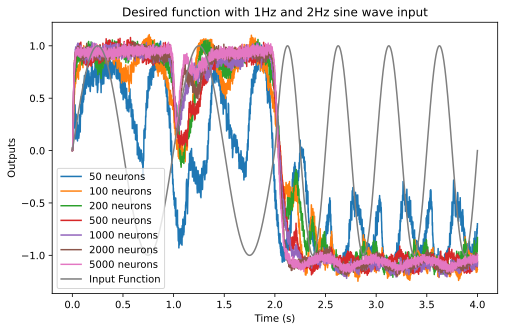

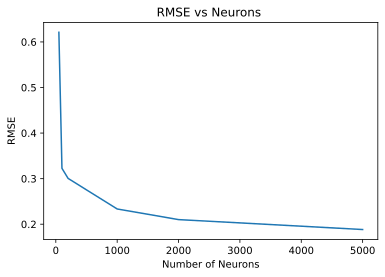

In [18]:
# ✍ <YOUR SOLUTION HERE>

neurons = [50,100, 200, 500, 1000, 2000, 5000]
inputs = (lambda t: np.sin(2*np.pi*t) if t<2 else np.sin(2*np.pi*t*2))

output = [[1]*2000, [-1]*2000]
output=np.array(output)
output=output.flatten().reshape(4000,1)

plt.figure(figsize=(8,5))

rmse = []
for n in neurons:

    sim, ensemble_probe, ensemble, model, input_func = lmu(inputs, neurons = n, sim_run = 4, q = 6)

    with model:
        ensemble_2 = nengo.Ensemble(50,
                                    dimensions = 1,
                                   )
        connection_3 = nengo.Connection(ensemble, ensemble_2, 
                                        eval_points = sim.data[ensemble_probe],
                                       function = output)
        ensemble_2_probe = nengo.Probe(ensemble_2, synapse = 0.01)

        ens_data = sim.data[ensemble_probe]
    with nengo.Simulator(model, dt = 0.001) as sim:
        sim.run(4)
        plt.plot(sim.trange(), sim.data[ensemble_2_probe], label = '{} neurons'.format(n))
       

    error = np.sqrt(np.mean(np.square(sim.data[ensemble_2_probe] - output)))
    rmse.append(error)
plt.xlabel('Time (s)')
plt.ylabel('Outputs')
plt.title('Desired function with 1Hz and 2Hz sine wave input')
plt.plot(sim.trange(), sim.data[input_func], label ='Input Function')
plt.legend()
plt.show()

plt.plot(neurons, rmse)
plt.xlabel('Number of Neurons')
plt.ylabel("RMSE")
plt.title('RMSE vs Neurons ')
plt.show()

✍ \<YOUR SOLUTION HERE\>

<!-- How does the model behaviour change? Why does this happen? In addition to looking at the actual results for each run, also plot the RMSE in the classification as you adjust the number of neurons. -->

As the number of neurons within the Ensemble increases, RMSE decreases. As there exists more neurons in the ensemble, they can better represent the ideal function with less noise overall. There is a signficance improvement of RMSE and neuron number from 50 to 1000 neurons, but the rate decreases from 1000 to 5000 neurons as neuron weightings overlap.

**e) Adjusting the q value. [2 marks]** Repeat part b) (returning to 1000 neurons) but adjust the value of `q`.  Try 1, 2, 4, 8, 16, 32, and 64.  How does the model behaviour change?  Why does this happen? In addition to looking at the actual results for each run, also plot the RMSE in the classification as you adjust the number of q values.  

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

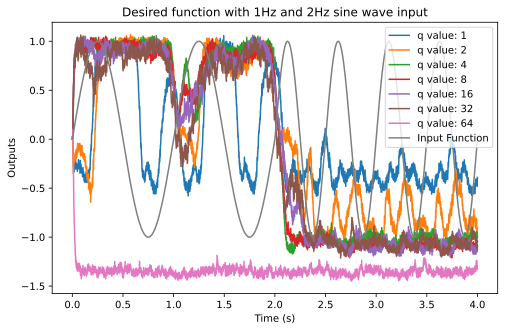

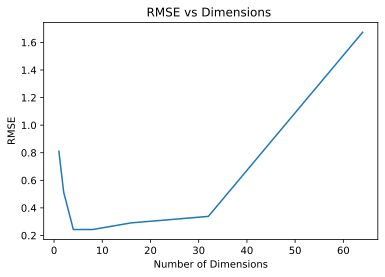

In [19]:
# ✍ <YOUR SOLUTION HERE>

q_arr = [1, 2, 4, 8, 16, 32, 64]
inputs = (lambda t: np.sin(2*np.pi*t) if t<2 else np.sin(2*np.pi*t*2))

output = [[1]*2000, [-1]*2000]
output=np.array(output)
output=output.flatten().reshape(4000,1)

plt.figure(figsize=(8,5))

rmse =[]
for q_value in q_arr:

    sim, ensemble_probe, ensemble, model, input_func = lmu(inputs, neurons = 1000, sim_run = 4, q = q_value)

    with model:
        ensemble_2 = nengo.Ensemble(50,
                                    dimensions = 1,
                                   )
        connection_3 = nengo.Connection(ensemble, ensemble_2, 
                                        eval_points = sim.data[ensemble_probe],
                                       function = output)
        ensemble_2_probe = nengo.Probe(ensemble_2, synapse = 0.01)

        ens_data = sim.data[ensemble_probe]
    with nengo.Simulator(model, dt = 0.001) as sim:
        sim.run(4)
        plt.plot(sim.trange(), sim.data[ensemble_2_probe], label = 'q value: {} '.format(q_value))
       

    error = np.sqrt(np.mean(np.square(sim.data[ensemble_2_probe] - output)))
    rmse.append(error)
    
plt.xlabel('Time (s)')
plt.ylabel('Outputs')
plt.title('Desired function with 1Hz and 2Hz sine wave input')
plt.plot(sim.trange(), sim.data[input_func], label ='Input Function')
plt.legend()
plt.show()

plt.plot(q_arr, rmse)
plt.xlabel('Number of Dimensions')
plt.ylabel("RMSE")
plt.title('RMSE vs Dimensions ')
plt.show()

✍ \<YOUR SOLUTION HERE\>

<!-- How does the model behaviour change? Why does this happen? In addition to looking at the actual results for each run, also plot the RMSE in the classification as you adjust the number of q values. -->

Increasing the Q value initially decreases RMSE. However, passed a threshold of a q value around 8, RMSE increases gradually until it rapidly increases from 32 to 64 dimensions. Larger dimensions add uncessary computation given the input signal that isnt as complex, resulting in heavy noise and worse representations of the ideal function. As a result the ideal q value should be experimented upon to find its optimal point.

# 3. Online Learning

Normally when building models with the Neural Engineering Framework, we compute the connection weights at the beginning and then leave them fixed while running the model.  But, we can also apply online learning rules to adjust the connection weights over time.  This has the effect of changing the function being computed.  One general learning rule is the PES rule, where you provide an extra input that indicates whether the output value should be increased or decreased.  This is generally called an error signal.

**a) Basic online learning. [2 marks]** Build a network that will learn the identity function.  You will need three `Ensembles`, one for the input, one for the output, and one for the error. Each one is 1-dimensional and uses 200 neurons.  For the input, use Nengo to randomly generate a 2Hz band-limited white noise signal as follows:

```python
stim = nengo.Node(nengo.processes.WhiteSignal(period=100, high=2, rms=0.3))
```

When making the learning connection, initialize it to compute the zero function and to use the PES learning rule as follows:
```python
def initialization(x):
    return 0
c = nengo.Connection(pre, post, function=initialization, learning_rule_type=nengo.PES(learning_rate=1e-4))
```

The error `Ensemble` should compute the difference between the output value and the desired output value.  For this initial question, we want the output value to be the same as the input value (i.e. we are learning the identity function).  Then connect the error `Ensemble` to the learning rule as follows:

```python
nengo.Connection(error, c.learning_rule)
```

(Note: for this question, leave the `synapse` values on the `Connections` at their default values)

Run the model for 10 seconds and plot the input value and the resulting output value (using a `Probe` with `synapse=0.01`).  The output should match the input fairly well after the first few seconds.

In [20]:
# ✍ <YOUR SOLUTION HERE>
def initialization(x):
    return 0

def basic_online(neurons = 200, lr = 1e-4, sim_run = 10,  seed = 18945):
    model = nengo.Network(seed = seed)
    
    with model:
        stim = nengo.Node(nengo.processes.WhiteSignal(period=100, high=2, rms=0.3))
        
        ensemble_1 = nengo.Ensemble(neurons, dimensions = 1)
        ensemble_2 = nengo.Ensemble(neurons, dimensions = 1)
        ensemble_3 = nengo.Ensemble(neurons, dimensions = 1)
        
        connection_1 = nengo.Connection(stim, ensemble_1)     
        connection_1_3 = nengo.Connection(ensemble_1, ensemble_3, transform = -1.0)
        connection_2_3 = nengo.Connection(ensemble_2, ensemble_3, transform = 1.0)
        
      
        
        c = nengo.Connection(ensemble_1, ensemble_2, function = initialization, 
                            learning_rule_type = nengo.PES(learning_rate = lr))
        connection_3_lr = nengo.Connection(ensemble_3, c.learning_rule)
      
        
        stim_probe = nengo.Probe(stim, synapse = 0.01)
        ensemble_1_probe = nengo.Probe(ensemble_1, synapse = 0.01)
        ensemble_2_probe = nengo.Probe(ensemble_2, synapse = 0.01)
        ensemble_3_probe = nengo.Probe(ensemble_3, synapse = 0.01)
    with nengo.Simulator(model, dt = 0.001) as sim:
            sim.run(sim_run)
    
    return sim, stim_probe, ensemble_1_probe, ensemble_2_probe, ensemble_3_probe, model

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

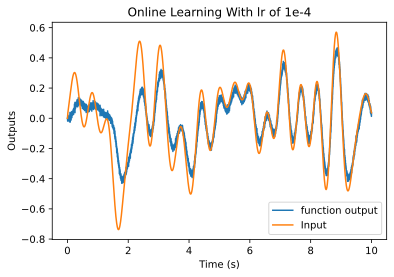

In [21]:
sim, stim, ensemble_1, ensemble_2, ensemble_3, model = basic_online()

plt.plot(sim.trange(), sim.data[ensemble_2], label = 'function output')
plt.plot(sim.trange(), sim.data[stim], label = 'Input')
plt.legend()
plt.title('Online Learning With lr of 1e-4')
plt.xlabel('Time (s)')
plt.ylabel('Outputs')
plt.show()

**b) Error calculation. [1 mark]**  What would happen if you reversed the sign of the error calculation (i.e. if you did `target - output` rather than `output - target`?  Why does that happen?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

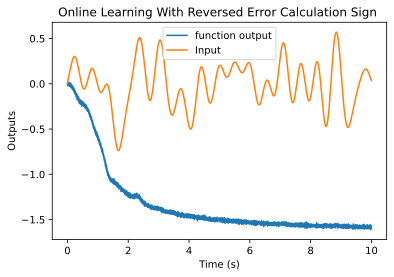

In [22]:
def basic_online(neurons = 200, lr = 1e-4, sim_run = 10,  seed = 18945):
    model = nengo.Network(seed = seed)
    
    with model:
        stim = nengo.Node(nengo.processes.WhiteSignal(period=100, high=2, rms=0.3))
        
        ensemble_1 = nengo.Ensemble(neurons, dimensions = 1)
        ensemble_2 = nengo.Ensemble(neurons, dimensions = 1)
        ensemble_3 = nengo.Ensemble(neurons, dimensions = 1)
        
        connection_1 = nengo.Connection(stim, ensemble_1)     
        connection_1_3 = nengo.Connection(ensemble_1, ensemble_3, transform = 1.0)
        connection_2_3 = nengo.Connection(ensemble_2, ensemble_3, transform = -1.0)
        
      
        
        c = nengo.Connection(ensemble_1, ensemble_2, function = initialization, 
                            learning_rule_type = nengo.PES(learning_rate = lr))
        connection_3_lr = nengo.Connection(ensemble_3, c.learning_rule)
      
        
        stim_probe = nengo.Probe(stim, synapse = 0.01)
        ensemble_1_probe = nengo.Probe(ensemble_1, synapse = 0.01)
        ensemble_2_probe = nengo.Probe(ensemble_2, synapse = 0.01)
        ensemble_3_probe = nengo.Probe(ensemble_3, synapse = 0.01)
    with nengo.Simulator(model, dt = 0.001) as sim:
            sim.run(sim_run)
    
    return sim, stim_probe, ensemble_1_probe, ensemble_2_probe, ensemble_3_probe, model


sim, stim, ensemble_1, ensemble_2, ensemble_3, model = basic_online()

plt.plot(sim.trange(), sim.data[ensemble_2], label = 'function output')
plt.plot(sim.trange(), sim.data[stim], label = 'Input')
plt.legend()
plt.title('Online Learning With Reversed Error Calculation Sign ')
plt.xlabel('Time (s)')
plt.ylabel('Outputs')
plt.show()

✍ \<YOUR SOLUTION HERE\>

<!-- What would happen if you reversed the sign of the error calculation (i.e. if you did target - output rather than output - target? Why does that happen? -->

Reversing the sign of the error calculation results in a function output that moves away from the input function. As a result, the optimization maximizes the error instead of minimizing it, resulting in an output moving further from the input function. The absolute value of the function output approaches the radius value of the ensemble. 

**c) Computing metrics. [1 mark]**  Break your data up into 2-second chunks and compute the Root-Mean-Squared-Error between the target value (the stimulus itself) and the output from the model for each chunk.  Since the simulation is 10 seconds long, you should have 5 RMSE measures (one for the first 2 seconds, one for the second 2 seconds, one for the third 2 seconds, and so on).  Repeat the simulation 10 times and plot the average for each of these values.  The result should show that the model gets better over time, but does not reach 0 error.  

In [23]:
# ✍ <YOUR SOLUTION HERE>

def initialization(x):
    return 0

def basic_online(neurons = 200, lr = 1e-4, sim_run = 10,  seed = 18945):
    model = nengo.Network(seed = seed)
    
    with model:
        stim = nengo.Node(nengo.processes.WhiteSignal(period=100, high=2, rms=0.3))
        
        ensemble_1 = nengo.Ensemble(neurons, dimensions = 1)
        ensemble_2 = nengo.Ensemble(neurons, dimensions = 1)
        ensemble_3 = nengo.Ensemble(neurons, dimensions = 1)
        
        connection_1 = nengo.Connection(stim, ensemble_1)     
        connection_1_3 = nengo.Connection(ensemble_1, ensemble_3, transform = -1.0)
        connection_2_3 = nengo.Connection(ensemble_2, ensemble_3, transform = 1.0)
        
      
        
        c = nengo.Connection(ensemble_1, ensemble_2, function = initialization, 
                            learning_rule_type = nengo.PES(learning_rate = lr))
        connection_3_lr = nengo.Connection(ensemble_3, c.learning_rule)
      
        
        stim_probe = nengo.Probe(stim, synapse = 0.01)
#         ensemble_1_probe = nengo.Probe(ensemble_1, synapse = 0.01)
        ensemble_2_probe = nengo.Probe(ensemble_2, synapse = 0.01)
#         ensemble_3_probe = nengo.Probe(ensemble_3, synapse = 0.01)
    with nengo.Simulator(model, dt = 0.001) as sim:
            sim.run(sim_run)
    
    return sim, stim_probe,  ensemble_2_probe







In [24]:
rmse = []
for i in range(10):
    sim, stim, ensemble_2 = basic_online(seed = 18945 + i)
        
    output = np.array(np.split(sim.data[ensemble_2],5))
    target = np.array(np.split(sim.data[stim],5))
    
    rmse.append(np.sqrt(np.mean(np.square(target-output),axis = 1)))



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0, 0.5, 'RMSE')

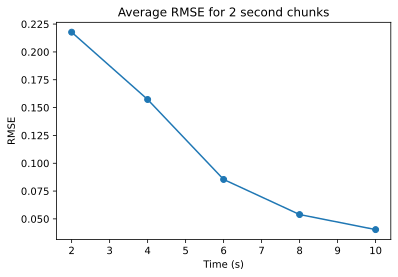

In [25]:
rmse_avg = np.mean(rmse,axis=0)
plt.plot([2,4,6,8,10], rmse_avg, marker = 'o')
plt.title('Average RMSE for 2 second chunks')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')

**d) Increasing learning time. [2 marks]**  Repeat part (c), but run the model for 100 seconds instead of 10 seconds.  How do the results change?

In [26]:
# ✍ <YOUR SOLUTION HERE>

rmse = []
for i in range(10):
    sim, stim, ensemble_2 = basic_online(sim_run = 100, seed = 18945 + i)

    output = np.array(np.split(sim.data[ensemble_2],50))
    target = np.array(np.split(sim.data[stim],50))
    
    rmse.append(np.sqrt(np.mean(np.square(target-output),axis = 1)))
    

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0, 0.5, 'RMSE')

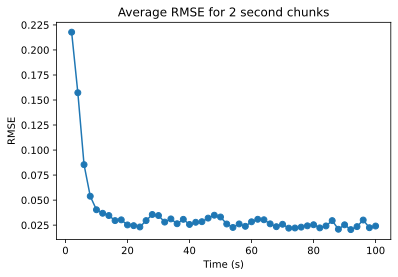

In [27]:
times = np.linspace(2,100,50)
rmse_avg = np.mean(rmse,axis=0)
plt.plot(times, rmse_avg, marker = 'o')
plt.title('Average RMSE for 2 second chunks')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')

✍ \<YOUR SOLUTION HERE\>

<!--  How do the results change? -->

Running the model for 100 seconds results in a overall lower RMSE value in comparison to running the model for 10 seconds. From 10-20 seconds, RMSE decreases gradually before staying constant at around 0.025. From 0 - 20 seconds, the model adjusts its weight over time until it reaches an optimal point. Past this point, the model weights change slightly based on the input but overall remain consistent. Changes in weight from this point may perform better at certain areas of the input, but perform worse in others, resulting in a consistent performance. Due to model parameters and dynamics, the model cannot be perfect and there is a limit to its performance, even with optimal weights.

**e) Learning rates. [2 marks]**  Repeat part (d), but decrease the learning rate to `1e-5`.  How do the results change?  How do they compare to part (c)?

In [28]:
# ✍ <YOUR SOLUTION HERE>

rmse = []
for i in range(10):
    sim, stim, ensemble_2 = basic_online(sim_run = 100, lr = 1e-5, seed = 18945 + i)
    
    output = np.array(np.split(sim.data[ensemble_2],50))
    target = np.array(np.split(sim.data[stim],50))
    
    rmse.append(np.sqrt(np.mean(np.square(target-output),axis = 1)))
    

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0, 0.5, 'RMSE')

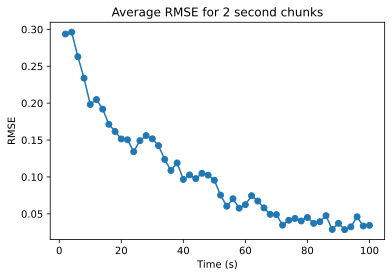

In [29]:
times = np.linspace(2,100,50)
rmse_avg = np.mean(rmse,axis=0)
plt.plot(times, rmse_avg, marker = 'o')
plt.title('Average RMSE for 2 second chunks')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')

✍ \<YOUR SOLUTION HERE\>

With a lr of 1e-5, the decrease in RMSE is more gradual compared to part d. With a smaller learning rate, we are taking smaller steps and adjustments to model weights with each iteration process, resulting in a more gradual performance improvement. Compared to part c), the performance is very similar. At the end of both simulations, RMSE ends at around 0.05. This makes sense as we are increasing simulation time by a magnitude and decreasing learning rate by a magnitude. 

**f) Improving performance. [1 mark]**  If you wanted to make the learned result even more accurate, how would you do this?  What would you change about the model and learning process?

✍ \<YOUR SOLUTION HERE\>

To make the result more accurate, I can increase the number of neurons used in the ensemble to better approximate the ideal function output as we have more model parameters overall, seen in 2d). Similarly, we can do a hyperparameter search to determine the ideal number of dimensions (q), as evident in 2e where there is a sweetspot in which RMSE is minimize. Ideal simulation time and learning rate can be determined through a similar hyperparameter search as well. Smaller learning rates may take extremely long to find a global minimum, and too high values may result in large steps of fluctuating RMSE values. Overall, these methods require time and computational resources to conduct experiments and analyze results. 


**g) Learning other functions. [1 mark]** Repeat part (a), but have the system learn a function where the input is a scalar $x$, but the output is the vector $[x^2, -x]$.  This will involve changing the dimensionality of some of the `Ensembles` and adding a `function=` to be computed on the `Connection` from the `stim` to the `error`.

In [30]:
def initialization(x):
    return [0,0]

def learn_func(x):
    return [x**2, -x]
    

def advanced_online(neurons = 200, lr = 1e-4, sim_run = 10,  seed = 18945):
    model = nengo.Network(seed = seed)
    
    with model:
        stim = nengo.Node(nengo.processes.WhiteSignal(period=100, high=2, rms=0.3))
        
        ensemble_1 = nengo.Ensemble(neurons, dimensions = 2)
        ensemble_2 = nengo.Ensemble(neurons, dimensions = 2)
        ensemble_3 = nengo.Ensemble(neurons, dimensions = 2)
        
        connection_1 = nengo.Connection(stim, ensemble_1, function = learn_func)     
        connection_1_3 = nengo.Connection(ensemble_1, ensemble_3, transform = -1.0)
        connection_2_3 = nengo.Connection(ensemble_2, ensemble_3, transform = 1.0)
        
      
        
        c = nengo.Connection(ensemble_1, ensemble_2, function = initialization, 
                            learning_rule_type = nengo.PES(learning_rate = lr))
        connection_3_lr = nengo.Connection(ensemble_3, c.learning_rule)
      
        
#         stim_probe = nengo.Probe(stim, synapse = 0.01)
        ensemble_1_probe = nengo.Probe(ensemble_1, synapse = 0.01)
        ensemble_2_probe = nengo.Probe(ensemble_2, synapse = 0.01)
#         ensemble_3_probe = nengo.Probe(ensemble_3, synapse = 0.01)
    with nengo.Simulator(model, dt = 0.001) as sim:
            sim.run(sim_run)
    
    return sim, ensemble_1_probe, ensemble_2_probe


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

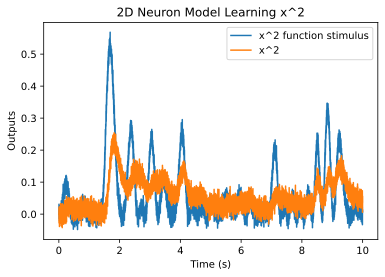

In [31]:
sim, ensemble_1, ensemble_2 = advanced_online()

plt.plot(sim.trange(), sim.data[ensemble_1][:,0], label = 'x^2 function stimulus')
plt.plot(sim.trange(), sim.data[ensemble_2][:,0], label = 'x^2')
plt.xlabel('Time (s)')
plt.ylabel('Outputs')
plt.legend()


plt.title('2D Neuron Model Learning x^2')
plt.show()

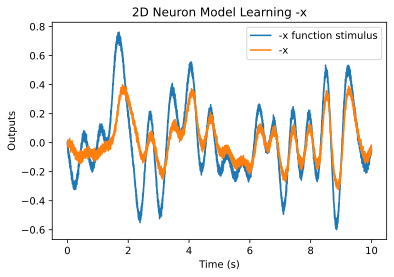

In [32]:
plt.plot(sim.trange(), sim.data[ensemble_1][:,1], label = '-x function stimulus')
plt.plot(sim.trange(), sim.data[ensemble_2][:,1], label = '-x')
plt.xlabel('Time (s)')
plt.ylabel('Outputs')
plt.title('2D Neuron Model Learning -x')
plt.legend()
plt.show()